DSV Virupaksha vegi

E21CSEU0697

Week7 Lab2

Early Stopping Concept





Import Given library

In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [22]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import the dataset 

In [23]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

Create Scatter Plot 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

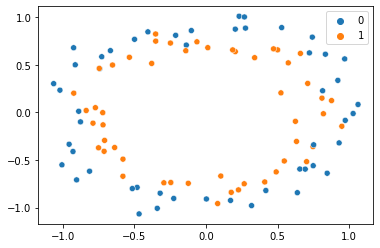

In [24]:
sns.scatterplot(X[:,0],X[:,1],hue=y)

Split data set into ( Train and test ) Test size : 0.2

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle=True)

Create Neurat Network with  1 Dense ( 256 , input dim- 2) activation - relu and output layer 

In [26]:
model = Sequential([Dense(256,input_dim=2,activation='relu')])
model.add(Dense(1))


Compile the network 

In [27]:
 model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


 Fit data and create history with epochs = 3500

In [ ]:
history = model.fit(X_train, y_train, epochs=3500, validation_data=(X_test, y_test))


Plot history loss and Val_loss

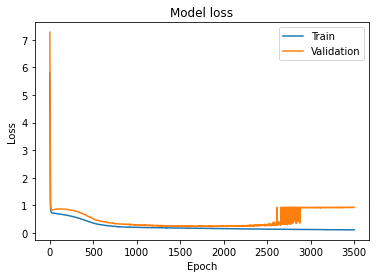

In [29]:
# Plot history of loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


make desicon boundy or region plot 

In [ ]:
plot_decision_regions(X_train, y_train, model)
plt.show()


# Early Stopping

Use same model and apply Early stapping with hyperparametr patience=20)

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20)


In [ ]:
history = model.fit(X_train, y_train, epochs=3500, validation_data=(X_test, y_test), callbacks=[early_stopping])


create History and Plot 

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plot the decision boundry 

In [ ]:
plot_decision_regions(X_train, y_train, model)
plt.show()